* Early Stopping
* Dropouts
* Reguralization (L1, L2)

### **Early Stopping**

In [10]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import layers

Dataset download: [Diabetes](https://drive.google.com/file/d/1fef7EEfZWGf4fcosnZoMGPSKiwDF1zO4/view?usp=drive_link)

In [4]:
# reading the data

df = pd.read_csv('../datasets/diabetes.csv')
print(f"Data: {df.shape}")
df.head()

Data: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = keras.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [24]:
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 100
)

Epoch 1/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6938 - loss: 0.5802 - val_accuracy: 0.7857 - val_loss: 0.5311
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7590 - loss: 0.4710 - val_accuracy: 0.7727 - val_loss: 0.5246
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8046 - loss: 0.4415 - val_accuracy: 0.7468 - val_loss: 0.5272
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7899 - loss: 0.4227 - val_accuracy: 0.7532 - val_loss: 0.5385
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8143 - loss: 0.4129 - val_accuracy: 0.7532 - val_loss: 0.5355
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8111 - loss: 0.4026 - val_accuracy: 0.7273 - val_loss: 0.5659
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8111 - loss: 0.3916 - val_accuracy: 0.7208 - val_loss: 0.5797
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8306 - loss: 0.3813 - val_accuracy: 0.7468 - val_loss: 0.

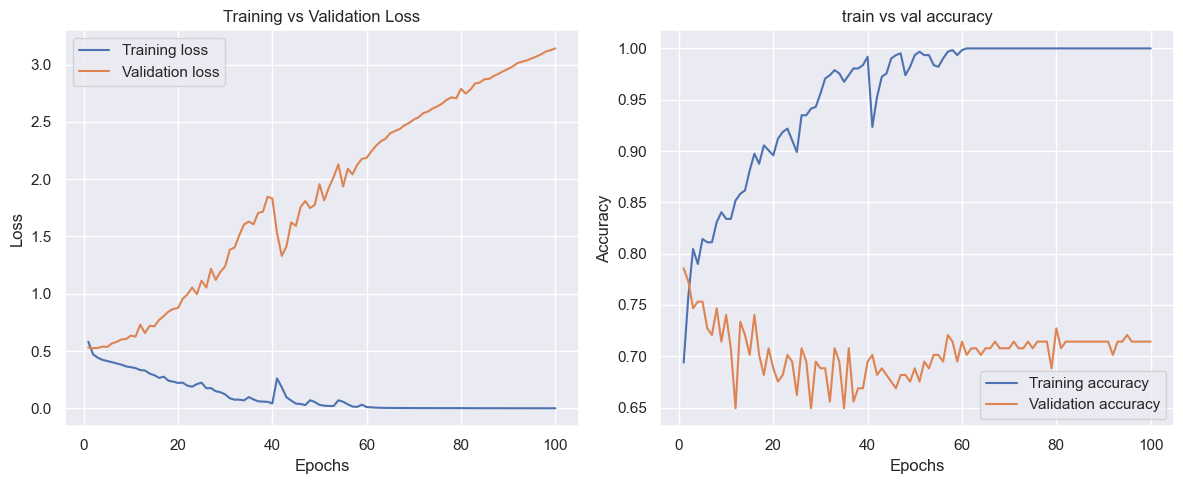

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

history_dict = history.history
loss = history_dict['loss']
accuracy = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

# plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# plot Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, accuracy, label = 'Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title("train vs val accuracy")
plt.legend()

plt.tight_layout()
plt.show()

We can observe that, as the epochs increases, the train loss decreases but the test loss increases (overfitting)

In [ ]:
def build_model(shape):
    model = keras.Sequential([
    layers.Input(shape=shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer = keras.optimizers.Adam(),
        loss = keras.losses.BinaryCrossentropy(),
        metrics = [keras.metrics.BinaryAccuracy(name='accuracy')]
    )

    return model

In [28]:
# applying Early Stopping

model = build_model((8,))

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights = True
)

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    callbacks = [early_stopping]
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7182 - loss: 0.5822 - val_accuracy: 0.7208 - val_loss: 0.5344
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7801 - loss: 0.4709 - val_accuracy: 0.7857 - val_loss: 0.5123
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7866 - loss: 0.4372 - val_accuracy: 0.7662 - val_loss: 0.5232
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7997 - loss: 0.4255 - val_accuracy: 0.7792 - val_loss: 0.5432
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7834 - loss: 0.4195 - val_accuracy: 0.7792 - val_loss: 0.5264


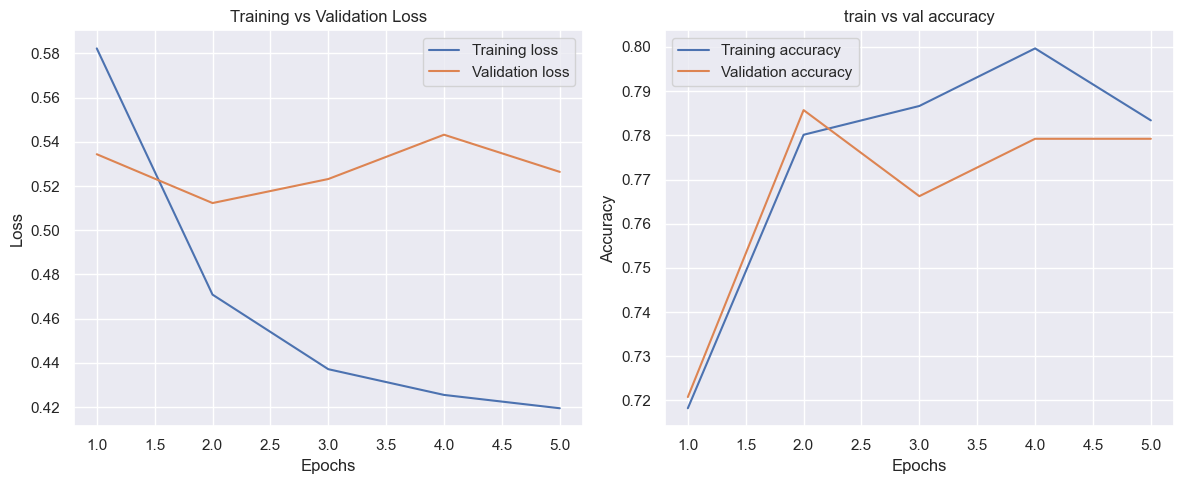

In [29]:
history_dict = history.history
loss = history_dict['loss']
accuracy = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

# plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# plot Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, accuracy, label = 'Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title("train vs val accuracy")
plt.legend()

plt.tight_layout()
plt.show()

This saves time and preserves the best weights that gives less loss and more accuracy

Callbacks are also used to do other tasks, while model is training (like visualizing the data for certain training steps.....)

### **Dropout**

In [31]:
def build_model(shape):
    model = keras.Sequential([
    layers.Input(shape=shape),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer = keras.optimizers.Adam(),
        loss = keras.losses.BinaryCrossentropy(),
        metrics = [keras.metrics.BinaryAccuracy(name='accuracy')]
    )

    return model

In [32]:
model = build_model((8,))

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 100
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6368 - loss: 0.6493 - val_accuracy: 0.6623 - val_loss: 0.6047
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6759 - loss: 0.5743 - val_accuracy: 0.7468 - val_loss: 0.5483
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7378 - loss: 0.5141 - val_accuracy: 0.7468 - val_loss: 0.5424
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7443 - loss: 0.5256 - val_accuracy: 0.7143 - val_loss: 0.5327
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7638 - loss: 0.4854 - val_accuracy: 0.7208 - val_loss: 0.5281
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7590 - loss: 0.5150 - val_accuracy: 0.7208 - val_loss: 0.5309
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7541 - loss: 0.4814 - val_accuracy: 0.7403 - val_loss: 0.5257
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7785 - loss: 0.4805 - val_accuracy: 0.7597 - 

We can observe that 

* When the Dropout is applied, the model validation loss is decreased alot than, the first model training.

### **Regularization**

* L1 regularization(Lasso)
* L2 regularization (Ridge)

#### **Without regularization**

In [7]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow import keras
from keras import layers

In [8]:
X,y = make_moons(
    n_samples=500,
    noise=0.25,
    random_state=42
)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

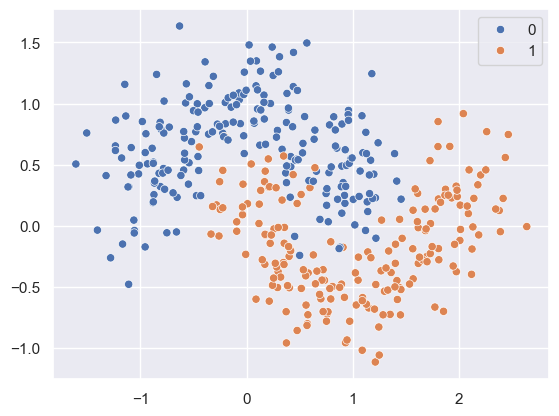

In [11]:
# plotting
sns.set_theme(style='darkgrid')
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train)
plt.show()

In [19]:
# model defining

model = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(64, activation='tanh', kernel_initializer='glorot_normal'),
    layers.Dense(128, activation='tanh', kernel_initializer='glorot_normal'),
    layers.Dense(256, activation='tanh', kernel_initializer='glorot_normal'),
    layers.Dense(128, activation='tanh', kernel_initializer='glorot_normal'),
    layers.Dense(64, activation='tanh', kernel_initializer='glorot_normal'),
    layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'),
])

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy(name='accuracy')]
)

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,753 (323.25 KB)

 Trainable params: 82,753 (323.25 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# model training

history = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = 1000,
    verbose = 0
)

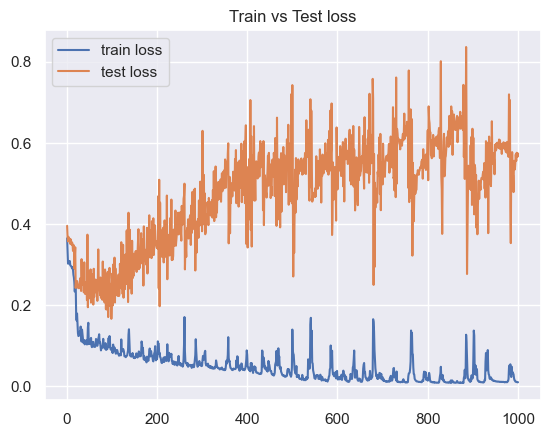

In [22]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = np.arange(1, len(loss)+1)

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.title('Train vs Test loss')
plt.legend()
plt.show()

We can clearly observe the model overfitting

#### **L2 regularization**

In [23]:

l2_reg = keras.regularizers.l2(0.03)

model_l2 = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(64, activation='tanh', kernel_initializer='glorot_normal', kernel_regularizer=l2_reg),
    layers.Dense(128, activation='tanh', kernel_initializer='glorot_normal', kernel_regularizer=l2_reg),
    layers.Dense(256, activation='tanh', kernel_initializer='glorot_normal', kernel_regularizer=l2_reg),
    layers.Dense(128, activation='tanh', kernel_initializer='glorot_normal', kernel_regularizer=l2_reg),
    layers.Dense(64, activation='tanh', kernel_initializer='glorot_normal', kernel_regularizer=l2_reg),
    layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_normal', kernel_regularizer=l2_reg),
])

model_l2.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy(name='accuracy')]
)

model_l2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,753 (323.25 KB)

 Trainable params: 82,753 (323.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# model training

history = model_l2.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = 1000,
    verbose = 0
)

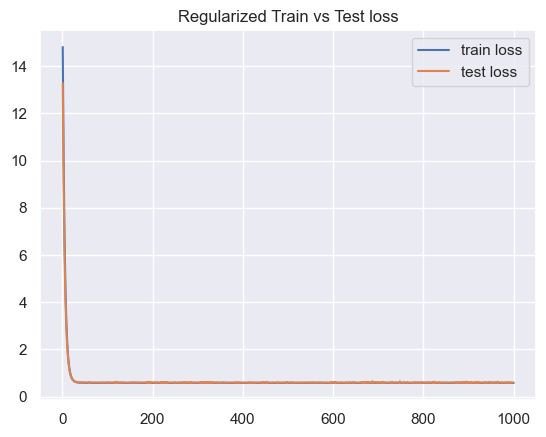

In [26]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = np.arange(1, len(loss)+1)

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.title('Regularized Train vs Test loss')
plt.legend()
plt.show()

We can observe that, both losses  converged

In [27]:
# model weights observing

m1_weights = model.get_weights()[0].reshape(-1)
m2_weights = model_l2.get_weights()[0].reshape(-1)

<Axes: >

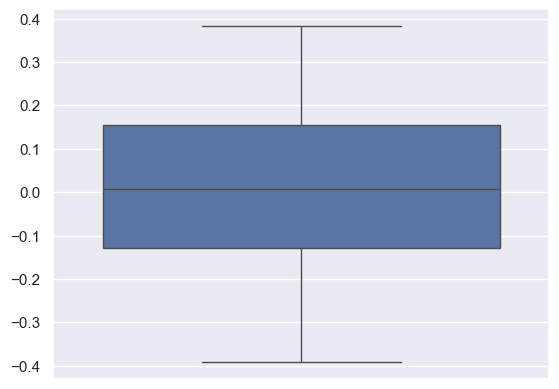

In [ ]:
# viewing in the box plot
sns.boxplot(m1_weights)

<Axes: >

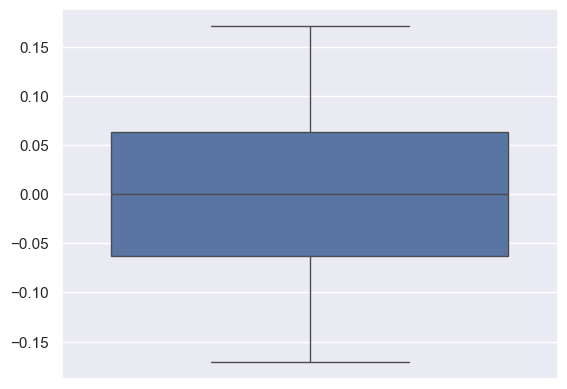

In [29]:
sns.boxplot(m2_weights)

We can observe that, model weights are small in l2 regularization, when compared to normal model weights

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 991us/step


<Axes: >

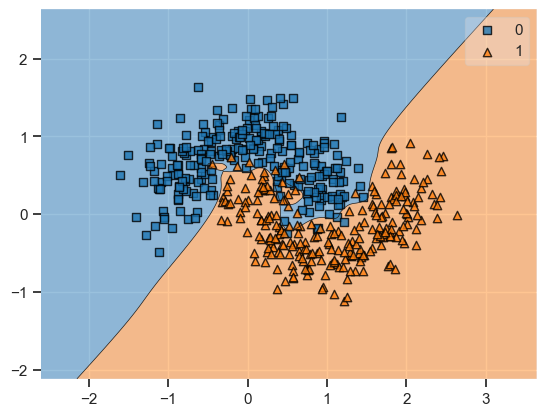

In [30]:
# plotting the region
# with first model

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

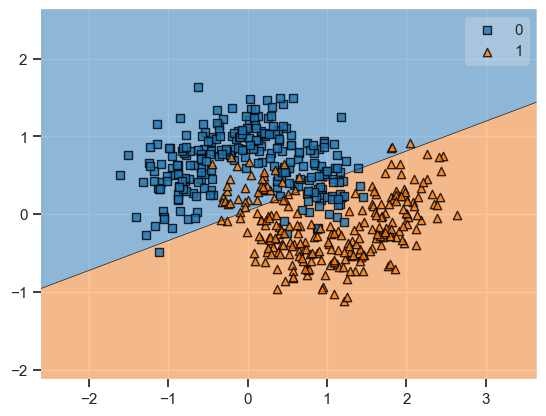

In [31]:
# with l2 reg model
plot_decision_regions(X, y, clf=model_l2)

We can observe the decition boundary was generalized

In [32]:
# using report to define the overfitting and regularization

probs1_train = model.predict(x_train)
y_pred1_train = (probs1_train >=0.5).astype(int)

print("classification report for train data with model_1:\n", classification_report(y_train, y_pred1_train))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
classification report for train data with model_1:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       207
           1       0.98      0.98      0.98       193

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [33]:
probs1_test = model.predict(x_test)
y_pred1_test = (probs1_test >=0.5).astype(int)

print("classification report for train data with model_1:\n", classification_report(y_test, y_pred1_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
classification report for train data with model_1:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        43
           1       1.00      0.82      0.90        57

    accuracy                           0.90       100
   macro avg       0.91      0.91      0.90       100
weighted avg       0.92      0.90      0.90       100



In [34]:
probs2_train = model_l2.predict(x_train)
y_pred2_train = (probs2_train >=0.5).astype(int)

print("classification report for train data with model_1:\n", classification_report(y_train, y_pred2_train))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
classification report for train data with model_1:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       207
           1       0.84      0.84      0.84       193

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [36]:
probs2_test = model_l2.predict(x_test)
y_pred2_test= (probs2_test >=0.5).astype(int)

print("classification report for train data with model_1:\n", classification_report(y_test, y_pred2_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
classification report for train data with model_1:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        43
           1       0.92      0.81      0.86        57

    accuracy                           0.85       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.86      0.85      0.85       100



We can observe the overfitting and balanced model from the scores also

If we want to use L1 regularization
* we use `keras.regularizers.l1('penality rate')`
* In general 'Low penality rates is sufficient for l1 when comapared to l2'

In [43]:
np.random.randn(4,2) + np.random.rand(1,2)

array([[ 1.96876507, -0.38383678],
       [-0.53994136,  1.36838531],
       [ 3.11201452,  0.03312928],
       [ 0.08637612,  0.61545424]])